## Introduction

This notebook presents the exploratory data analysis (EDA) and visualization component of a project that aims to predict whether a customer will recommend a product based on their review. The dataset contains customer feedback from an e-commerce clothing retailer. The insights gained from this analysis will guide the development of a binary classification model to predict product recommendations.

## Load libraries and Inspect Data

We begin by loading the dataset and performing an initial inspection to understand the structure, column names, and types of data we are dealing with.

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


df = pd.read_csv("C:/Users/orucz/OneDrive/Рабочий стол/RR project/Womens Clothing E-Commerce Reviews.csv")

## Data Cleaning

This step includes removing duplicates, standardizing column names for ease of use, and stripping whitespace from text entrieg.

In [28]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.drop_duplicates(inplace=True)

## Handling Missing Values

We drop rows with missing values in essential columns such as 'review_text' and 'recommended_ind', which are critical for the prediction task. For less essential text fields like 'title', we impute missing values with empty strings to maintain consistency.

In [29]:
df = df.dropna(subset=['review_text', 'recommended_ind'])
df['title'] = df['title'].fillna('')

## One-Hot Encoding for Categorical Variables

To use categorical features in machine learning models, we convert them into binary format using one-hot encoding. This step ensures that our model can interpret and learn from features such as 'division_name', 'department_name', and 'class_name'.

In [30]:
df = pd.get_dummies(df, columns=['division_name', 'department_name', 'class_name'], drop_first=True)

## TF-IDF Vectorization

We apply TF-IDF to the review text to convert unstructured text data into numerical form. This method helps highlight the most relevant words in customer feedback for the classification task.

In [31]:
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = tfidf.fit_transform(df['review_text'])

## Feature Engineering: Review Length

As an additional feature, we calculate the length of each review in terms of word count. This can reveal patterns in verbosity between positive and negative feedback, potentially aiding in model performance.

In [32]:
df['review_length'] = df['review_text'].apply(lambda x: len(x.split()))

## Exploratory Data Analysis (EDA)

We conduct statistical analysis and visualizations to understand key characteristics of the data. This includes:

- Distribution of the target variable (`recommended_ind`)
- Relationship between age and recommendations
- Frequency of feedback across product categories
- Word clouds to visualize common themes in positive and negative reviews

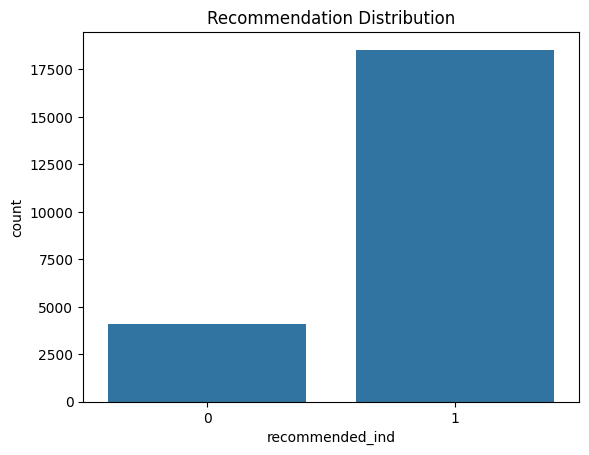

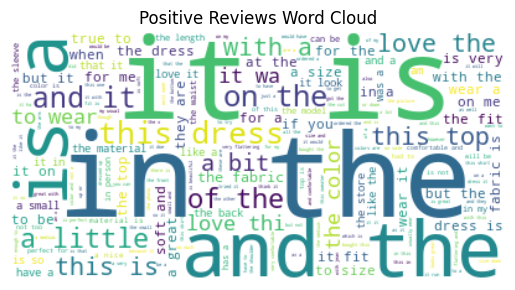

In [33]:
# recommendation distribution
sns.countplot(x='recommended_ind', data=df)
plt.title("Recommendation Distribution")
plt.show()

# wordcloud for positive reviews
positive_reviews = " ".join(df[df['recommended_ind']==1]['review_text'])
wc = WordCloud(stopwords='english', background_color='white').generate(positive_reviews)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()